## CV_Assignment_6
1. What is the difference between TRAINABLE and NON-TRAINABLE PARAMETERS?
2. In the CNN architecture, where does the DROPOUT LAYER go?
3. What is the optimal number of hidden layers to stack?
4. In each layer, how many secret units or filters should there be?
5. What should your initial learning rate be?
6. What do you do with the activation function?
7. What is NORMALIZATION OF DATA?
8. What is IMAGE AUGMENTATION and how does it work?
9. What is DECLINE IN LEARNING RATE?
10. What does EARLY STOPPING CRITERIA mean?

In [6]:
'''Ans 1:- Trainable parameters are weights and biases within a
neural network that are updated during training to minimize the
loss. Non-trainable parameters are fixed, like hyperparameters
or pre-trained model weights.

In this code, we use TensorFlow 2.x to implement linear
regression. We define a custom loss function, compute gradients with
tf.GradientTape, and optimize a trainable parameter ('w') using stochastic
gradient descent (SGD) to minimize the loss, ultimately estimating
the correct weight for the linear relationship.'''

import tensorflow as tf

# Sample data
x = tf.constant([1.0, 2.0, 3.0], dtype=tf.float32)
y = tf.constant([2.0, 4.0, 6.0], dtype=tf.float32)

# Trainable parameter (weight)
w = tf.Variable(1.0, dtype=tf.float32)

# Non-trainable parameter (constant)
learning_rate = 0.01

# Define a custom loss function
def custom_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(w * x - y_true))

# Training operation to update the trainable parameter
def train_step():
    with tf.GradientTape() as tape:
        loss = custom_loss(y, w * x)
    gradients = tape.gradient(loss, [w])
    optimizer.apply_gradients(zip(gradients, [w]))

# Gradient descent optimizer
optimizer = tf.optimizers.SGD(learning_rate)

# Initialize variables
tf.compat.v1.global_variables_initializer()

# Training loop
for i in range(100):
    train_step()

# Get the final trainable parameter (weight)
trained_weight = w.numpy()

print("Trainable Parameter (Weight):", trained_weight)

Trainable Parameter (Weight): 1.9999443


In [7]:
'''Ans 2:- In a Convolutional Neural Network (CNN), the DROPOUT LAYER
is typically placed after fully connected layers or dense
layers to prevent overfitting. In this example, the Dropout layer
is inserted before the final output layer to regularize the
model. The 0.5 argument represents the dropout rate, which
determines the fraction of input units to drop during training.'''

import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
'''Ans 3:- The optimal number of hidden layers in a neural network
varies depending on factors like problem complexity, available
data, and computational resources. Complex tasks often benefit
from deeper networks, while simpler tasks may require fewer
layers. However, deep networks can be prone to overfitting, so
regularization techniques are crucial. Empirical experimentation and
monitoring performance on validation data help determine the right
depth. Architectural innovations like residual connections have
made training very deep networks feasible. In practice,
adapting established architectures or using transfer learning often
simplifies this decision-making process.'''

In [ ]:
'''Ans 4:- The number of hidden units or filters in each layer of a
neural network, including convolutional layers in CNNs, is a
hyperparameter that depends on the specific problem and architecture.
Typically, the number of units or filters increases as you move
deeper into the network, capturing increasingly abstract
features. Common choices range from a few dozen to several hundred,
with more complex tasks often requiring larger numbers for
effective representation learning. Experimentation and tuning are
essential to determine the optimal number for a given task.'''

In [11]:
'''Ans 5:- The initial learning rate in neural network training is a
crucial hyperparameter that affects convergence. A common starting
point is 0.01. However, the optimal rate can vary depending on
the problem. It's essential to experiment with different
values. 

This code sets an initial learning rate of 0.01 using
stochastic gradient descent (SGD) as the optimizer. The initial
learning rate can be adjusted based on experimentation and learning
curve analysis for optimal training performance.'''

import tensorflow as tf
import numpy as np

# Generate random sample data
np.random.seed(0)
x_train = np.random.rand(1000, 784)
y_train = np.random.randint(10, size=1000)

# Define a simple neural network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with an initial learning rate
initial_learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(x_train, y_train, epochs=epochs, verbose=2)

# Print the initial learning rate
print(f"Initial Learning Rate: {initial_learning_rate}")

Epoch 1/10
32/32 - 0s - loss: 2.3848 - accuracy: 0.0960 - 259ms/epoch - 8ms/step
Epoch 2/10
32/32 - 0s - loss: 2.3380 - accuracy: 0.1040 - 61ms/epoch - 2ms/step
Epoch 3/10
32/32 - 0s - loss: 2.3119 - accuracy: 0.1200 - 55ms/epoch - 2ms/step
Epoch 4/10
32/32 - 0s - loss: 2.2918 - accuracy: 0.1380 - 60ms/epoch - 2ms/step
Epoch 5/10
32/32 - 0s - loss: 2.2783 - accuracy: 0.1290 - 57ms/epoch - 2ms/step
Epoch 6/10
32/32 - 0s - loss: 2.2636 - accuracy: 0.1540 - 65ms/epoch - 2ms/step
Epoch 7/10
32/32 - 0s - loss: 2.2540 - accuracy: 0.1570 - 63ms/epoch - 2ms/step
Epoch 8/10
32/32 - 0s - loss: 2.2392 - accuracy: 0.1690 - 62ms/epoch - 2ms/step
Epoch 9/10
32/32 - 0s - loss: 2.2344 - accuracy: 0.1900 - 65ms/epoch - 2ms/step
Epoch 10/10
32/32 - 0s - loss: 2.2170 - accuracy: 0.1880 - 64ms/epoch - 2ms/step
Initial Learning Rate: 0.01


In [1]:
'''Ans 6:- An activation function introduces non-linearity to neural
networks, allowing them to learn complex relationships in data.
Common activation functions like ReLU (Rectified Linear Unit) are
applied to layer outputs.In this code, ReLU is applied to the
input data x using a simple neural network, and the transformed
output y is printed. The ReLU activation function replaces
negative values with zeros, introducing non-linearity to the
network's transformations.'''

import tensorflow as tf
import numpy as np

# Sample data
x = np.array([-2.0, -1.0, 0.0, 1.0, 2.0], dtype=float)

# simple neural network with ReLU activation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, activation='relu', input_shape=(1,))
])

# Apply activation function to input data
y = model.predict(x)
print(y)

1/1 [==============================] - 0s 94ms/step
[[0.         1.9730699  0.        ]
 [0.         0.98653495 0.        ]
 [0.         0.         0.        ]
 [0.5834298  0.         0.02206862]
 [1.1668596  0.         0.04413724]]


In [2]:
'''Ans 7:- Normalization of data is the process of scaling and
standardizing numerical features in a dataset to a common range,
typically between 0 and 1 or with a mean of 0 and standard deviation
of 1. This ensures that different features have comparable
magnitudes, preventing some features from dominating others during
machine learning model training. Normalization aids in improving
model convergence, performance, and generalization, especially
in algorithms sensitive to feature scales, like
gradient-based optimization.

In this example, we use the Min-Max scaler to normalize
the sample data. The fit_transform method scales the data to
the range [0, 1], ensuring that both features have comparable
scales.

using the Min-Max scaler In the normalized data, each
feature now falls within the range [0, 1], making them comparable
and suitable for machine learning algorithms sensitive to
feature scales.'''

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Sample data
data = np.array([[1.0, 2.0],
                 [2.0, 3.0],
                 [3.0, 4.0]])

# Create a Min-Max scaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
normalized_data = scaler.fit_transform(data)

# Print the normalized data
print("Original data:")
print(data)
print("\nNormalized data:")
print(normalized_data)

Original data:
[[1. 2.]
 [2. 3.]
 [3. 4.]]

Normalized data:
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


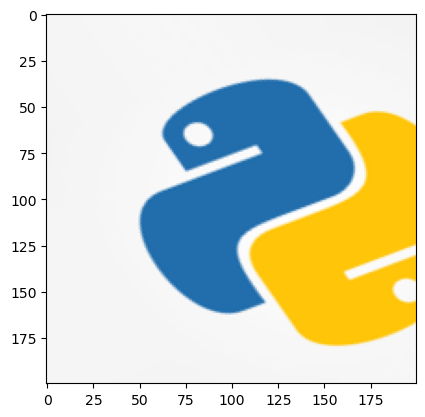

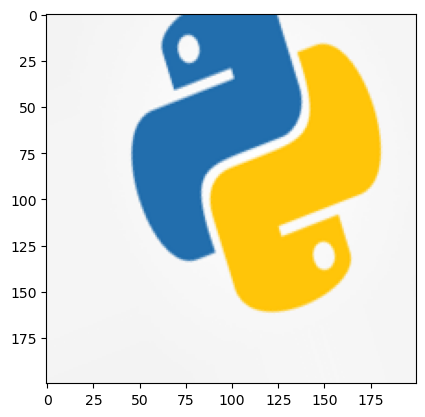

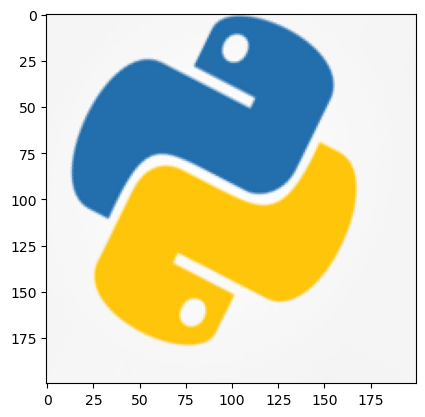

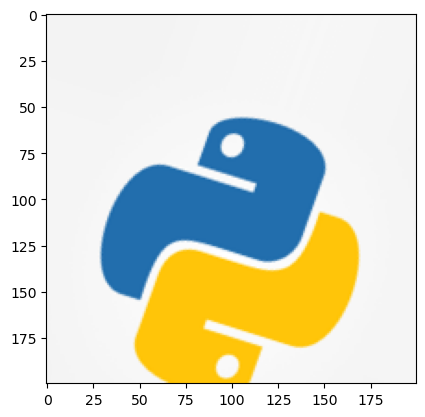

In [4]:
'''Ans 8:- Image augmentation is a technique used in computer vision
and deep learning to increase the diversity of training data
by applying various transformations to the original images.
It helps improve model generalization and robustness by
exposing the network to a wider range of variations.

1. Original Data: You start with a dataset of original
images for training.

2. Augmentation: Various transformations are applied to the images,
such as rotation, scaling, flipping, brightness/contrast adjustments,
and more. These transformations create new, slightly modified images 
from the original ones.

3. Expanded Dataset: The augmented images are added to the training dataset,
effectively increasing its size.

4. Training: The model is then trained on this expanded dataset,
which includes both the original and augmented images.

In this code, we create an ImageDataGenerator with various
augmentation settings, then apply it to an example image. The flow
method generates and displays augmented versions of the image,
showcasing different transformations like rotation, shifting,
shearing, zooming, and flipping. These augmented images can be added
to your training dataset for more diverse training.'''

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt  

# ImageDataGenerator with augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load an image
img = tf.keras.preprocessing.image.load_img('sample.png')
x = tf.keras.preprocessing.image.img_to_array(img)
x = tf.expand_dims(x, axis=0)

# Generate augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

In [ ]:
'''Ans 9:- A decline in learning rate, often called "learning rate
decay" or "learning rate scheduling," is a technique in training
neural networks where the learning rate decreases gradually
during training. It helps improve optimization stability and
convergence. Initially, a higher learning rate facilitates rapid
progress, and as training progresses, the rate decreases to
fine-tune the model's parameters, ensuring that it converges to an
optimal solution while avoiding overshooting or oscillation in the
loss landscape.'''

In [5]:
'''Ans 10:- Early stopping criteria is a technique used during model
training to prevent overfitting. It monitors a chosen metric (e.g.,
validation loss or accuracy) during training and stops training if
the metric stops improving or starts degrading, signaling that
further training may lead to overfitting.

In this code, we generate random linear data and create a
simple linear regression model. Early stopping monitors the
validation loss, and training will stop if it doesn't improve for 10
consecutive epochs. The training history is printed to see the
progress.'''

import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np

# Generate random sample data
np.random.seed(0)
x_train = np.random.rand(100, 1)
y_train = 2 * x_train + 1 + np.random.randn(100, 1) * 0.1

# Define a simple linear regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# Compile the model
model.compile(optimizer='sgd', loss='mse')

# Define early stopping criteria
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 consecutive epochs
    restore_best_weights=True  # Restore the model with the best weights
)

# Split the data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train the model with early stopping
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=1000, callbacks=[early_stopping])

# Print the training history
print("Training history:")
print(history.history)

Epoch 1/1000
3/3 [==============================] - 0s 68ms/step - loss: 4.6626 - val_loss: 4.6600
Epoch 2/1000
3/3 [==============================] - 0s 23ms/step - loss: 4.0555 - val_loss: 4.0781
Epoch 3/1000
3/3 [==============================] - 0s 21ms/step - loss: 3.5380 - val_loss: 3.5469
Epoch 4/1000
3/3 [==============================] - 0s 19ms/step - loss: 3.0725 - val_loss: 3.0850
Epoch 5/1000
3/3 [==============================] - 0s 28ms/step - loss: 2.6695 - val_loss: 2.6852
Epoch 6/1000
3/3 [==============================] - 0s 18ms/step - loss: 2.3213 - val_loss: 2.3364
Epoch 7/1000
3/3 [==============================] - 0s 22ms/step - loss: 2.0211 - val_loss: 2.0458
Epoch 8/1000
3/3 [==============================] - 0s 21ms/step - loss: 1.7709 - val_loss: 1.7933
Epoch 9/1000
3/3 [==============================] - 0s 19ms/step - loss: 1.5524 - val_loss: 1.5748
Epoch 10/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.3638 - val_loss: 1.3785
Epoch 11/

3/3 [==============================] - 0s 16ms/step - loss: 0.1047 - val_loss: 0.0629
Epoch 84/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.1040 - val_loss: 0.0624
Epoch 85/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.1031 - val_loss: 0.0620
Epoch 86/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.1023 - val_loss: 0.0616
Epoch 87/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.1015 - val_loss: 0.0612
Epoch 88/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.1008 - val_loss: 0.0608
Epoch 89/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0999 - val_loss: 0.0604
Epoch 90/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0991 - val_loss: 0.0600
Epoch 91/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0984 - val_loss: 0.0594
Epoch 92/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0976 - val_loss: 0.0590
Epoch 93/1000


3/3 [==============================] - 0s 21ms/step - loss: 0.0567 - val_loss: 0.0345
Epoch 165/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0563 - val_loss: 0.0342
Epoch 166/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0559 - val_loss: 0.0341
Epoch 167/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0555 - val_loss: 0.0338
Epoch 168/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0551 - val_loss: 0.0336
Epoch 169/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0547 - val_loss: 0.0334
Epoch 170/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0543 - val_loss: 0.0332
Epoch 171/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0540 - val_loss: 0.0330
Epoch 172/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0535 - val_loss: 0.0328
Epoch 173/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0531 - val_loss: 0.0326
Epoch

3/3 [==============================] - 0s 20ms/step - loss: 0.0329 - val_loss: 0.0212
Epoch 246/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0327 - val_loss: 0.0211
Epoch 247/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0325 - val_loss: 0.0210
Epoch 248/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0323 - val_loss: 0.0209
Epoch 249/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0321 - val_loss: 0.0208
Epoch 250/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0319 - val_loss: 0.0207
Epoch 251/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0317 - val_loss: 0.0206
Epoch 252/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0315 - val_loss: 0.0205
Epoch 253/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0314 - val_loss: 0.0204
Epoch 254/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0312 - val_loss: 0.0203
Epoch

3/3 [==============================] - 0s 19ms/step - loss: 0.0213 - val_loss: 0.0147
Epoch 327/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0212 - val_loss: 0.0146
Epoch 328/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0211 - val_loss: 0.0146
Epoch 329/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0210 - val_loss: 0.0145
Epoch 330/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0210 - val_loss: 0.0145
Epoch 331/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0209 - val_loss: 0.0144
Epoch 332/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0208 - val_loss: 0.0144
Epoch 333/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0207 - val_loss: 0.0143
Epoch 334/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0206 - val_loss: 0.0142
Epoch 335/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0205 - val_loss: 0.0142
Epoch

3/3 [==============================] - 0s 25ms/step - loss: 0.0157 - val_loss: 0.0116
Epoch 408/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0156 - val_loss: 0.0116
Epoch 409/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0156 - val_loss: 0.0116
Epoch 410/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0155 - val_loss: 0.0116
Epoch 411/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0155 - val_loss: 0.0115
Epoch 412/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0154 - val_loss: 0.0115
Epoch 413/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0154 - val_loss: 0.0115
Epoch 414/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0153 - val_loss: 0.0115
Epoch 415/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0153 - val_loss: 0.0114
Epoch 416/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0152 - val_loss: 0.0114
Epoch

3/3 [==============================] - 0s 17ms/step - loss: 0.0129 - val_loss: 0.0102
Epoch 489/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0129 - val_loss: 0.0102
Epoch 490/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0128 - val_loss: 0.0102
Epoch 491/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0128 - val_loss: 0.0102
Epoch 492/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0128 - val_loss: 0.0102
Epoch 493/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0128 - val_loss: 0.0102
Epoch 494/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0127 - val_loss: 0.0102
Epoch 495/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0127 - val_loss: 0.0102
Epoch 496/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0127 - val_loss: 0.0101
Epoch 497/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0126 - val_loss: 0.0101
Epoch

3/3 [==============================] - 0s 21ms/step - loss: 0.0115 - val_loss: 0.0096
Epoch 570/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0115 - val_loss: 0.0096
Epoch 571/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0115 - val_loss: 0.0095
Epoch 572/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0114 - val_loss: 0.0095
Epoch 573/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0114 - val_loss: 0.0095
Epoch 574/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.0114 - val_loss: 0.0095
Epoch 575/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0114 - val_loss: 0.0095
Epoch 576/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0114 - val_loss: 0.0095
Epoch 577/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0114 - val_loss: 0.0095
Epoch 578/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0114 - val_loss: 0.0095
Epoch

3/3 [==============================] - 0s 26ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 651/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 652/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 653/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 654/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 655/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 656/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch 657/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch 658/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch 659/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0107 - val_loss: 0.0093
Epoch

3/3 [==============================] - 0s 21ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 732/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 733/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 734/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 735/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0105 - val_loss: 0.0092
Epoch 736/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 737/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 738/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 739/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch 740/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0104 - val_loss: 0.0092
Epoch

3/3 [==============================] - 0s 22ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 813/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 814/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 815/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 816/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 817/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 818/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 819/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 820/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0103 - val_loss: 0.0091
Epoch 821/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0103 - val_loss: 0.0091
Train